The task is to use Non-Negative Matrix Factorization for topic modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# extending the stopwords list
stopwords = set(stopwords.words('english'))

In [4]:
stopwords = stopwords.union({'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'mrs', 'new', 'year'})

In [5]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [6]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [7]:
# use the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [8]:
X = vectorizer.fit_transform(df['text'])

In [9]:
# use a model with NMF 
nmf = NMF(n_components=10, beta_loss='kullback-leibler', solver='mu')

In [10]:
nmf.fit(X)

NMF(alpha=0.0, beta_loss='kullback-leibler', init=None, l1_ratio=0.0,
    max_iter=200, n_components=10, random_state=None, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

In [11]:
# show top 10 words from 10 topics
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('NMF', fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

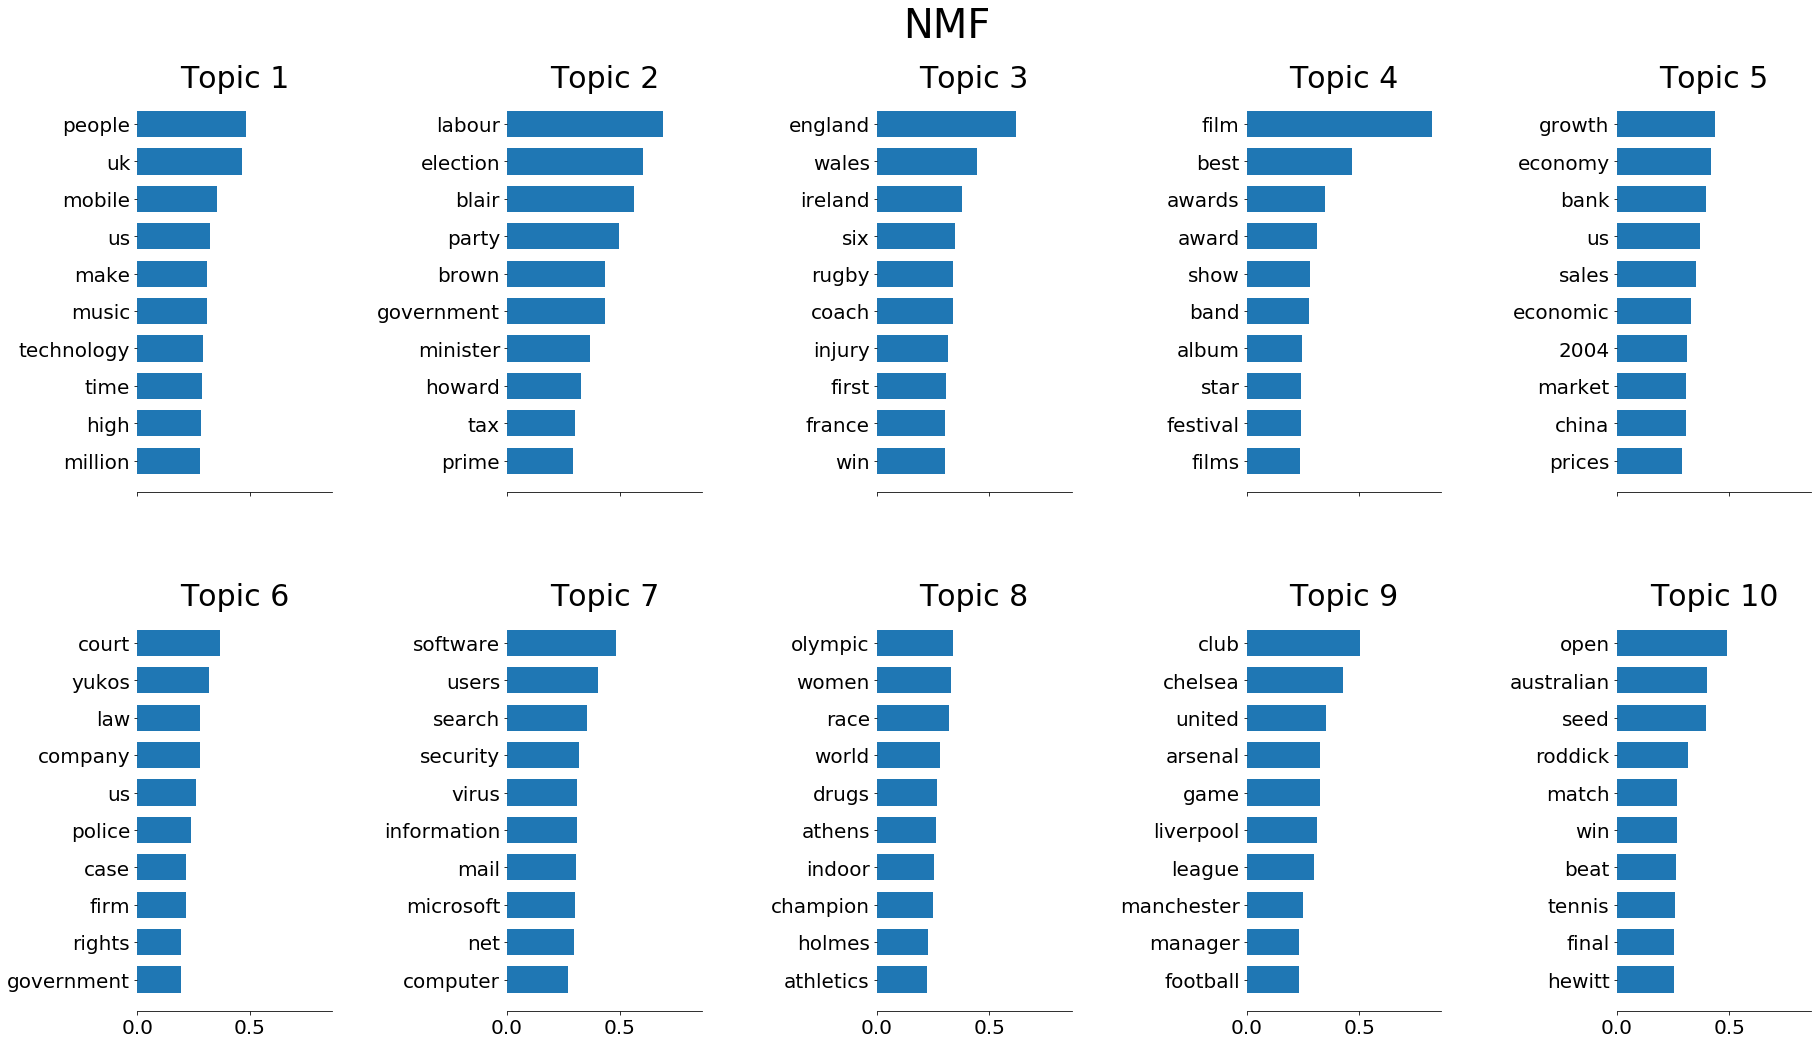

In [12]:
feature_names = vectorizer.get_feature_names()
plot_top_words(nmf, feature_names)

In [13]:
Z = nmf.transform(X)

Text(0.5, 1.0, 'True label: tech')

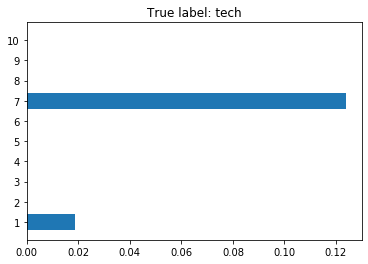

In [14]:
# pick a random document, check which topics are associated with it and if they're related to the true label
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [15]:
# the random text belongs to tech section and is connected to the topic 7 which makes sense
print(textwrap.fill(df.iloc[i]['text'], replace_whitespace=False, fix_sentence_endings=True))

Savvy searchers fail to spot ads

Internet search engine users are an
odd mix of naive and sophisticated, suggests a report into search
habits.

The report by the US Pew Research Center reveals that 87% of
searchers usually find what they were looking for when using a search
engine.  It also shows that few can spot the difference between paid-
for results and organic ones.  The report reveals that 84% of net
users say they regularly use Google, Ask Jeeves, MSN and Yahoo when
online.

Almost 50% of those questioned said they would trust search
engines much less, if they knew information about who paid for results
was being hidden.  According to figures gathered by the Pew
researchers the average users spends about 43 minutes per month
carrying out 34 separate searches and looks at 1.9 webpages for each
hunt.  A significant chunk of net users, 36%, carry out a search at
least weekly and 29% of those asked only look every few weeks.  For
44% of those questioned, the information they are l